   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Default Random Forest (10 trees) Accuracy: 1.0000

Confusion Matrix (Default Model):
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


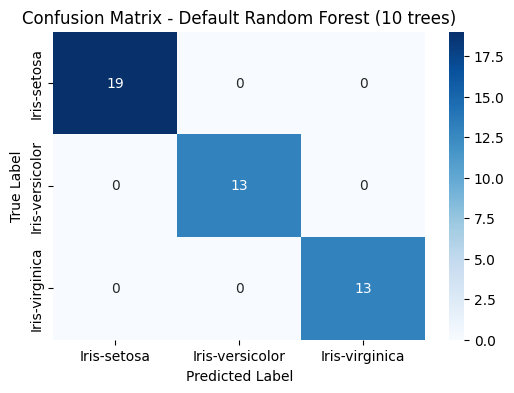


Classification Report (Default Model):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45


Best Accuracy: 1.0000 achieved with 1 trees

Confusion Matrix (Best Model):
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


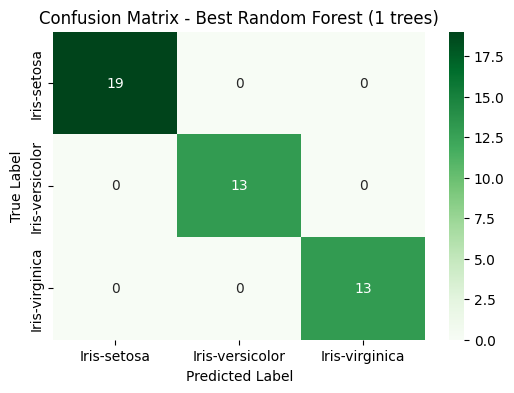


Classification Report (Best Model):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



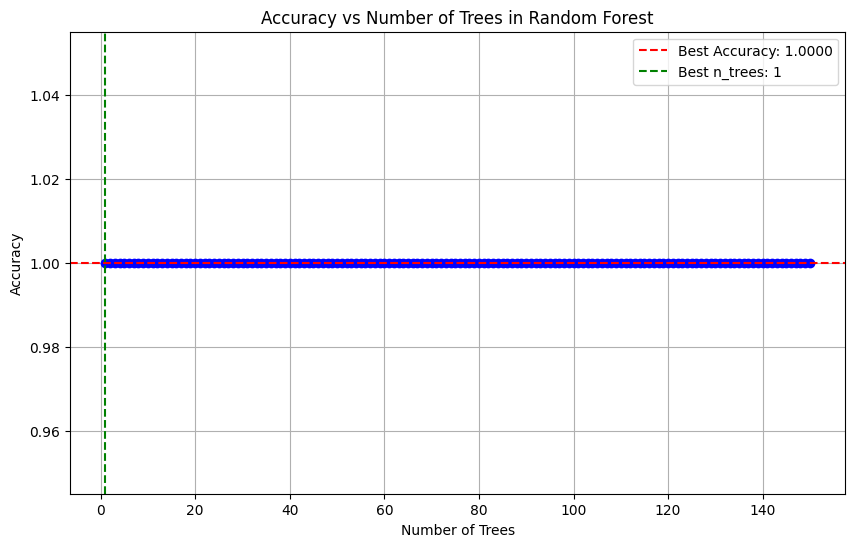

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris_data = pd.read_csv('/content/iris (3).csv')

# Check the first few rows to understand the structure
print(iris_data.head())

# Separate features and target
X = iris_data.drop('species', axis=1)  # Assuming the target column is named 'species'
y = iris_data['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Build Random Forest with default n_estimators (10)
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred_default = rf_default.predict(X_test)
default_accuracy = accuracy_score(y_test, y_pred_default)
print(f"\nDefault Random Forest (10 trees) Accuracy: {default_accuracy:.4f}")

# Confusion matrix for default model
cm_default = confusion_matrix(y_test, y_pred_default)
print("\nConfusion Matrix (Default Model):")
print(cm_default)

# Plot confusion matrix for default model
plt.figure(figsize=(6, 4))
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_default.classes_,
            yticklabels=rf_default.classes_)
plt.title('Confusion Matrix - Default Random Forest (10 trees)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report for default model
print("\nClassification Report (Default Model):")
print(classification_report(y_test, y_pred_default))

# 2. Fine-tune by changing number of trees
n_trees_range = range(1, 151)  # Testing from 1 to 150 trees
accuracies = []

for n_trees in n_trees_range:
    rf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Find the best accuracy and corresponding number of trees
best_accuracy = max(accuracies)
best_n_trees = n_trees_range[accuracies.index(best_accuracy)]
print(f"\nBest Accuracy: {best_accuracy:.4f} achieved with {best_n_trees} trees")

# Build the best model
rf_best = RandomForestClassifier(n_estimators=best_n_trees, random_state=42)
rf_best.fit(X_train, y_train)
y_pred_best = rf_best.predict(X_test)

# Confusion matrix for best model
cm_best = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix (Best Model):")
print(cm_best)

# Plot confusion matrix for best model
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens',
            xticklabels=rf_best.classes_,
            yticklabels=rf_best.classes_)
plt.title(f'Confusion Matrix - Best Random Forest ({best_n_trees} trees)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report for best model
print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best))

# Plot accuracy vs number of trees
plt.figure(figsize=(10, 6))
plt.plot(n_trees_range, accuracies, color='blue', linestyle='dashed', marker='o')
plt.title('Accuracy vs Number of Trees in Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.axhline(y=best_accuracy, color='r', linestyle='--', label=f'Best Accuracy: {best_accuracy:.4f}')
plt.axvline(x=best_n_trees, color='g', linestyle='--', label=f'Best n_trees: {best_n_trees}')
plt.legend()
plt.grid()
plt.show()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   fnlwgt          48842 non-null  int64
 2   education_num   48842 non-null  int64
 3   capital_gain    48842 non-null  int64
 4   capital_loss    48842 non-null  int64
 5   hours_per_week  48842 non-null  int64
 6   income_level    48842 non-null  int64
dtypes: int64(7)
memory usage: 2.6 MB
None

First 5 rows:
   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0     

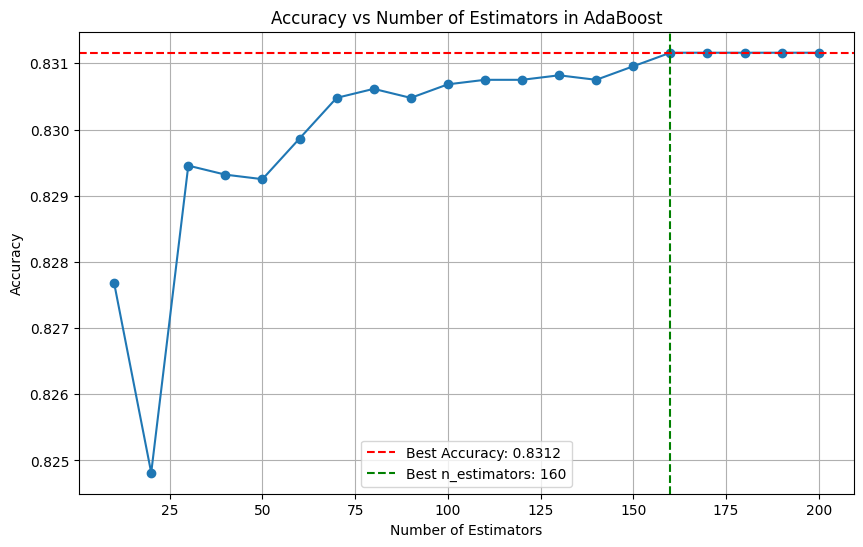

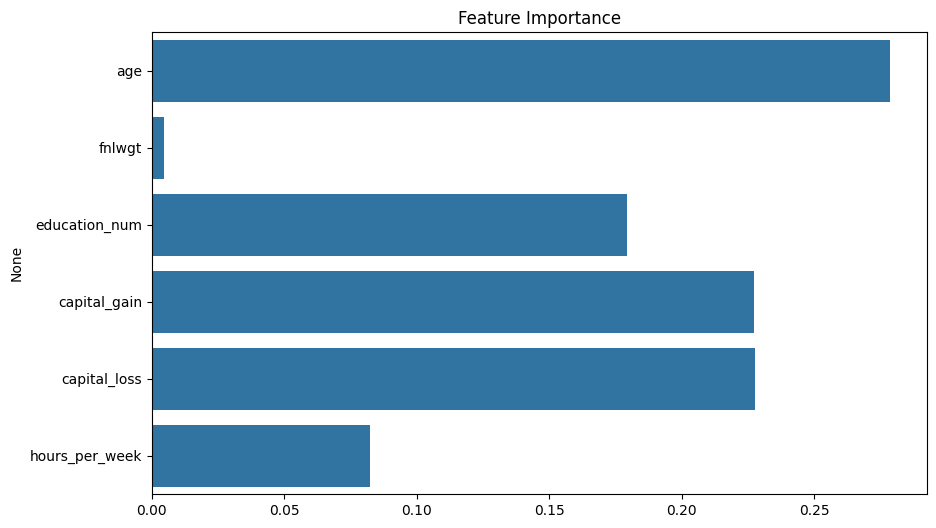

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
income_data = pd.read_csv('/content/income.csv')

# Display basic info
print("Dataset Info:")
print(income_data.info())
print("\nFirst 5 rows:")
print(income_data.head())

# Preprocessing
# Convert categorical variables to numerical
label_encoders = {}
categorical_cols = income_data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    income_data[col] = le.fit_transform(income_data[col])
    label_encoders[col] = le

# Separate features and target - USING income_level AS TARGET
X = income_data.drop('income_level', axis=1)  # Using correct column name
y = income_data['income_level']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Build AdaBoost with n_estimators=10
ada_default = AdaBoostClassifier(n_estimators=10, random_state=42)
ada_default.fit(X_train, y_train)

# Predictions
y_pred_default = ada_default.predict(X_test)
default_accuracy = accuracy_score(y_test, y_pred_default)
print(f"\nAdaBoost (10 estimators) Accuracy: {default_accuracy:.4f}")

# Confusion matrix
print("\nConfusion Matrix (Default Model):")
cm_default = confusion_matrix(y_test, y_pred_default)
print(cm_default)

# Classification report
print("\nClassification Report (Default Model):")
print(classification_report(y_test, y_pred_default))

# 2. Fine-tune by changing number of estimators
n_estimators_range = range(10, 201, 10)  # Testing from 10 to 200 in steps of 10
accuracies = []

for n_est in n_estimators_range:
    ada = AdaBoostClassifier(n_estimators=n_est, random_state=42)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Estimators: {n_est:3d} | Accuracy: {accuracy:.4f}")

# Find best accuracy
best_accuracy = max(accuracies)
best_n_estimators = n_estimators_range[accuracies.index(best_accuracy)]
print(f"\nBest Accuracy: {best_accuracy:.4f} achieved with {best_n_estimators} estimators")

# Build best model
ada_best = AdaBoostClassifier(n_estimators=best_n_estimators, random_state=42)
ada_best.fit(X_train, y_train)
y_pred_best = ada_best.predict(X_test)

# Confusion matrix for best model
print("\nConfusion Matrix (Best Model):")
cm_best = confusion_matrix(y_test, y_pred_best)
print(cm_best)

# Classification report for best model
print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best))

# Plot accuracy vs number of estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o')
plt.title('Accuracy vs Number of Estimators in AdaBoost')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.axhline(y=best_accuracy, color='r', linestyle='--', label=f'Best Accuracy: {best_accuracy:.4f}')
plt.axvline(x=best_n_estimators, color='g', linestyle='--', label=f'Best n_estimators: {best_n_estimators}')
plt.legend()
plt.grid()
plt.show()

# Feature importance
if hasattr(ada_best, 'feature_importances_'):
    feature_importance = ada_best.feature_importances_
    features = X.columns
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=features)
    plt.title('Feature Importance')
    plt.show()

Actual columns in your CSV file: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


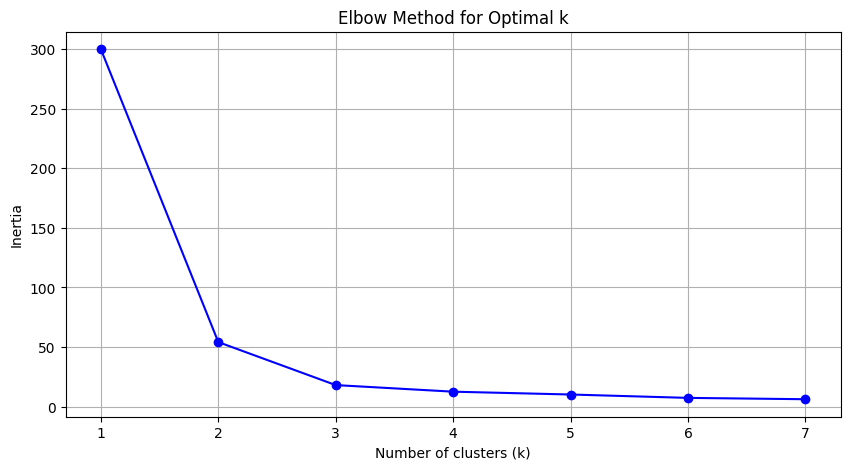

<ipython-input-4-fc1877fc20b2>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = clusters


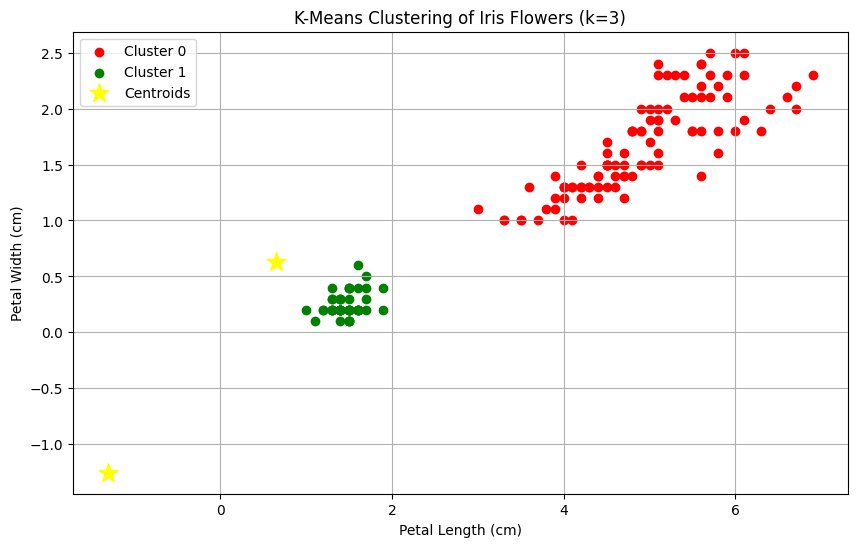

Silhouette Score: 0.743


In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load and examine data
iris = pd.read_csv("/content/iris (3).csv")
print("Actual columns in your CSV file:", iris.columns.tolist())  # This will show us the correct column names

# Prepare data - ADJUST THESE BASED ON THE OUTPUT ABOVE
# Common column name variations for petal features:
petal_length_col = 'petal_length'  # Try these common alternatives
petal_width_col = 'petal_width'    # if the first attempt fails

# Try to find the correct columns automatically
possible_length_names = ['petal_length', 'petal length (cm)', 'petallength', 'PetalLength', 'petal.length']
possible_width_names = ['petal_width', 'petal width (cm)', 'petalwidth', 'PetalWidth', 'petal.width']

# Find matching columns
petal_length_col = next((col for col in iris.columns if col.lower() in [name.lower() for name in possible_length_names]), None)
petal_width_col = next((col for col in iris.columns if col.lower() in [name.lower() for name in possible_width_names]), None)

if not petal_length_col or not petal_width_col:
    raise ValueError("Could not identify petal length/width columns in the CSV. Please check the column names.")

data = iris[[petal_length_col, petal_width_col]]
data.columns = ['petal length (cm)', 'petal width (cm)']  # Standardize names

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Elbow method to find optimal k
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 8), inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

# Build final model with k=3
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add clusters to dataframe
data['cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in range(optimal_k):
    plt.scatter(data[data['cluster'] == i]['petal length (cm)'],
                data[data['cluster'] == i]['petal width (cm)'],
                c=colors[i], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', marker='*', label='Centroids')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-Means Clustering of Iris Flowers (k=3)')
plt.legend()
plt.grid()
plt.show()

# Evaluate clustering
print(f"Silhouette Score: {silhouette_score(scaled_data, clusters):.3f}")